# The [[5, 1, 3]] Code
Notes and implementation of the ideas found in: https://www2.physics.ox.ac.uk/sites/default/files/ErrorCorrectionSteane06.pdf \
https://www.scottaaronson.com/qclec.pdf - lecture 28

some dude's master thesis:
https://odr.chalmers.se/bitstream/20.500.12380/302690/1/Master_Thesis_Holmin_Andersson.pdf
https://github.com/Serock3/Master_thesis_QEC_simulation

page 11:
$X \otimes I \otimes Z \otimes Y \otimes X = X_{10011} Z_{00110}$

$$$
\begin{matrix}
    X_{10011} & Z_{00110} & X_{10011} Z_{00110}\\
    X & I & X\\
    I & I & I\\
    I & Z & Z\\
    X & Z & Y\\
    X & I & X\\
\end{matrix}
$$$

In [ ]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
I = Operator([[1, 0], [0, 1]])
Z = Operator([[1, 0], [0, -1]])

In [ ]:
out = X^I^Z^X.compose(Z)^X

In [ ]:
out

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,
            0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j,
            0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,
           -0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,
           -0.+0

In [ ]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import QuantumRegister, ClassicalRegister, AncillaRegister, QuantumCircuit

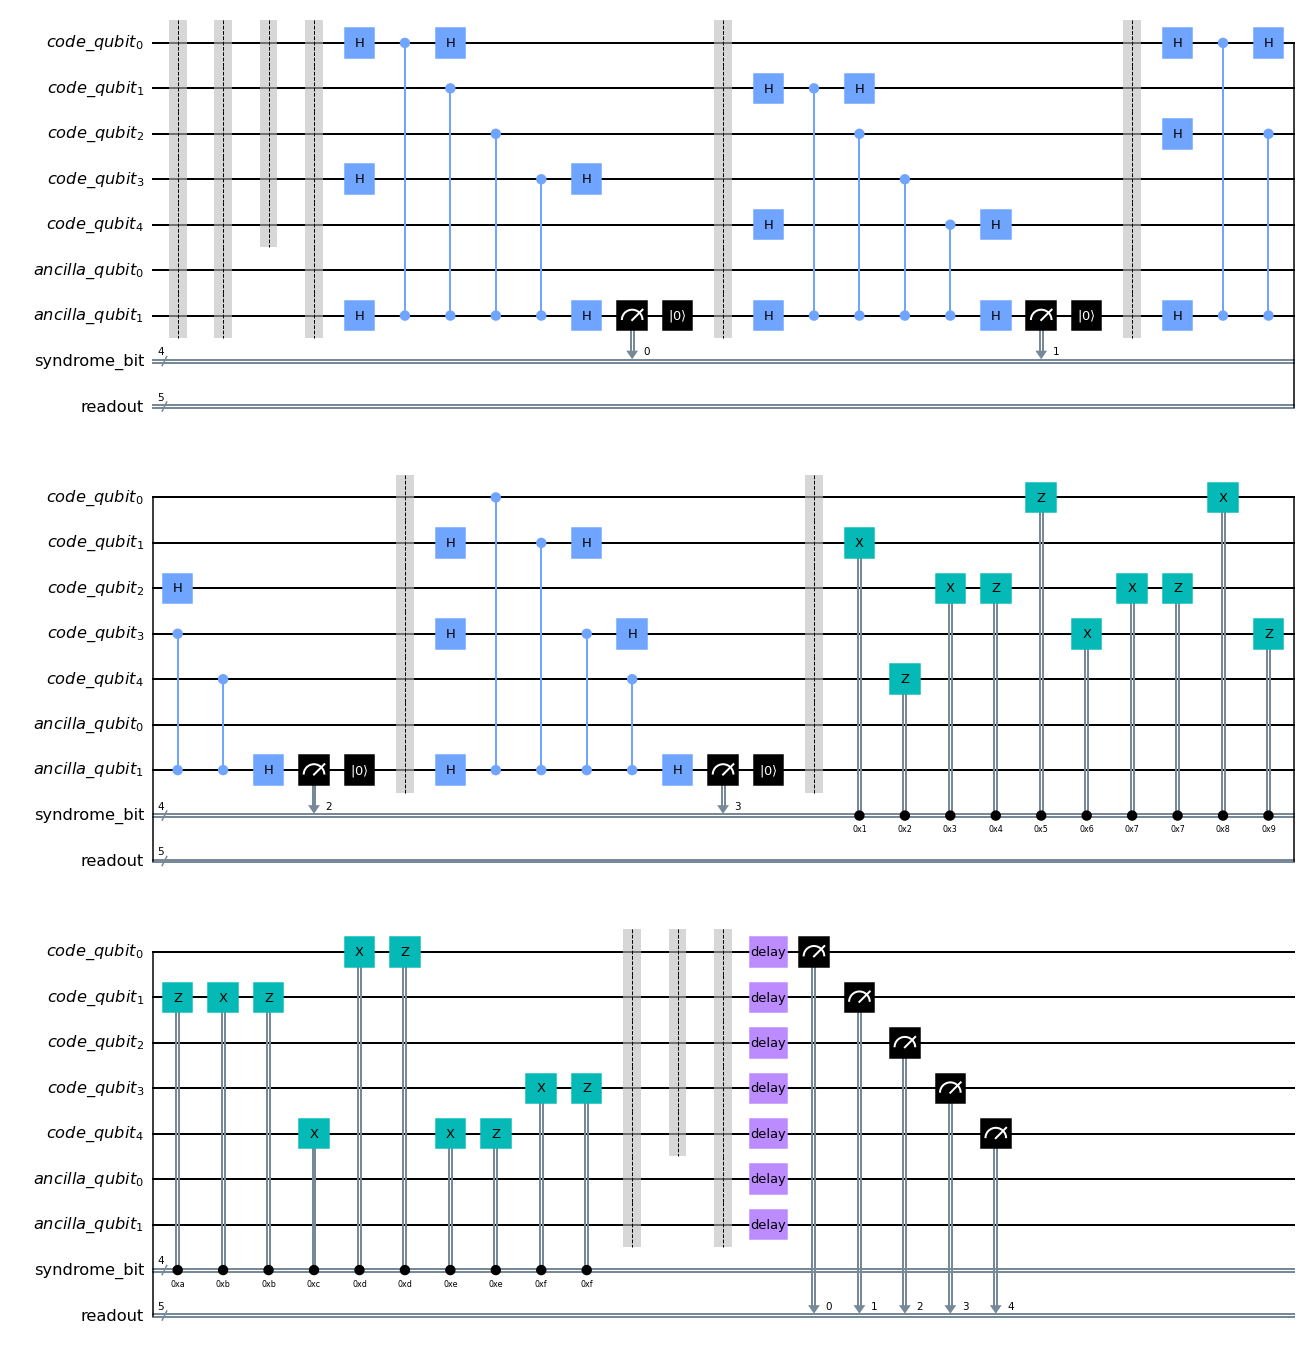

In [ ]:
kwargs = {
    'recovery': True,
    'encoding' : False}

# Define our registers
qb = QuantumRegister(5, 'code_qubit')
an = AncillaRegister(2, 'ancilla_qubit')
cr = ClassicalRegister(4, 'syndrome_bit')  # The typical register
# cr = get_classical_register(n_cycles) # Advanced list of registers
readout = ClassicalRegister(5, 'readout')

registers = StabilizerRegisters(qb, an, cr, readout)

# Get the complete circuit
circ = get_full_stabilizer_circuit(registers, **kwargs)
#circ.measure(qb, readout)
display(circ.draw(output='mpl'))

In [ ]:
# Run it
n_shots = 2000
results = execute(
    circ,
    Aer.get_backend('qasm_simulator'),
    noise_model=None,
    shots=n_shots
).result()

In [ ]:
results.get_counts(circ)

{'10010 0000': 132,
 '11011 0000': 144,
 '01001 0000': 137,
 '00110 0000': 117,
 '00101 0000': 95,
 '00011 0000': 125,
 '01100 0000': 128,
 '11110 0000': 139,
 '10001 0000': 120,
 '01010 0000': 115,
 '00000 0000': 134,
 '10100 0000': 123,
 '11101 0000': 120,
 '01111 0000': 133,
 '11000 0000': 126,
 '10111 0000': 112}

In [ ]:
from stabilizers_steane import get_full_stabilizer_circuit_steane, StabilizerRegistersSteane
n_cycles = 1
reset = True
recovery = False
snapshot_type = 'statevector'

# Define quantum registers and circuit
qb = QuantumRegister(7, 'qubit')
an = AncillaRegister(3, 'ancilla_qubit')
readout= ClassicalRegister(7, 'readout')
cr = ClassicalRegister(6, 'syndrome bits')
registers = StabilizerRegistersSteane(qb, an, cr, readout)

# Full circuit
circ = get_full_stabilizer_circuit_steane(registers, n_cycles=n_cycles,
    reset=reset, recovery=recovery, snapshot_type=snapshot_type)

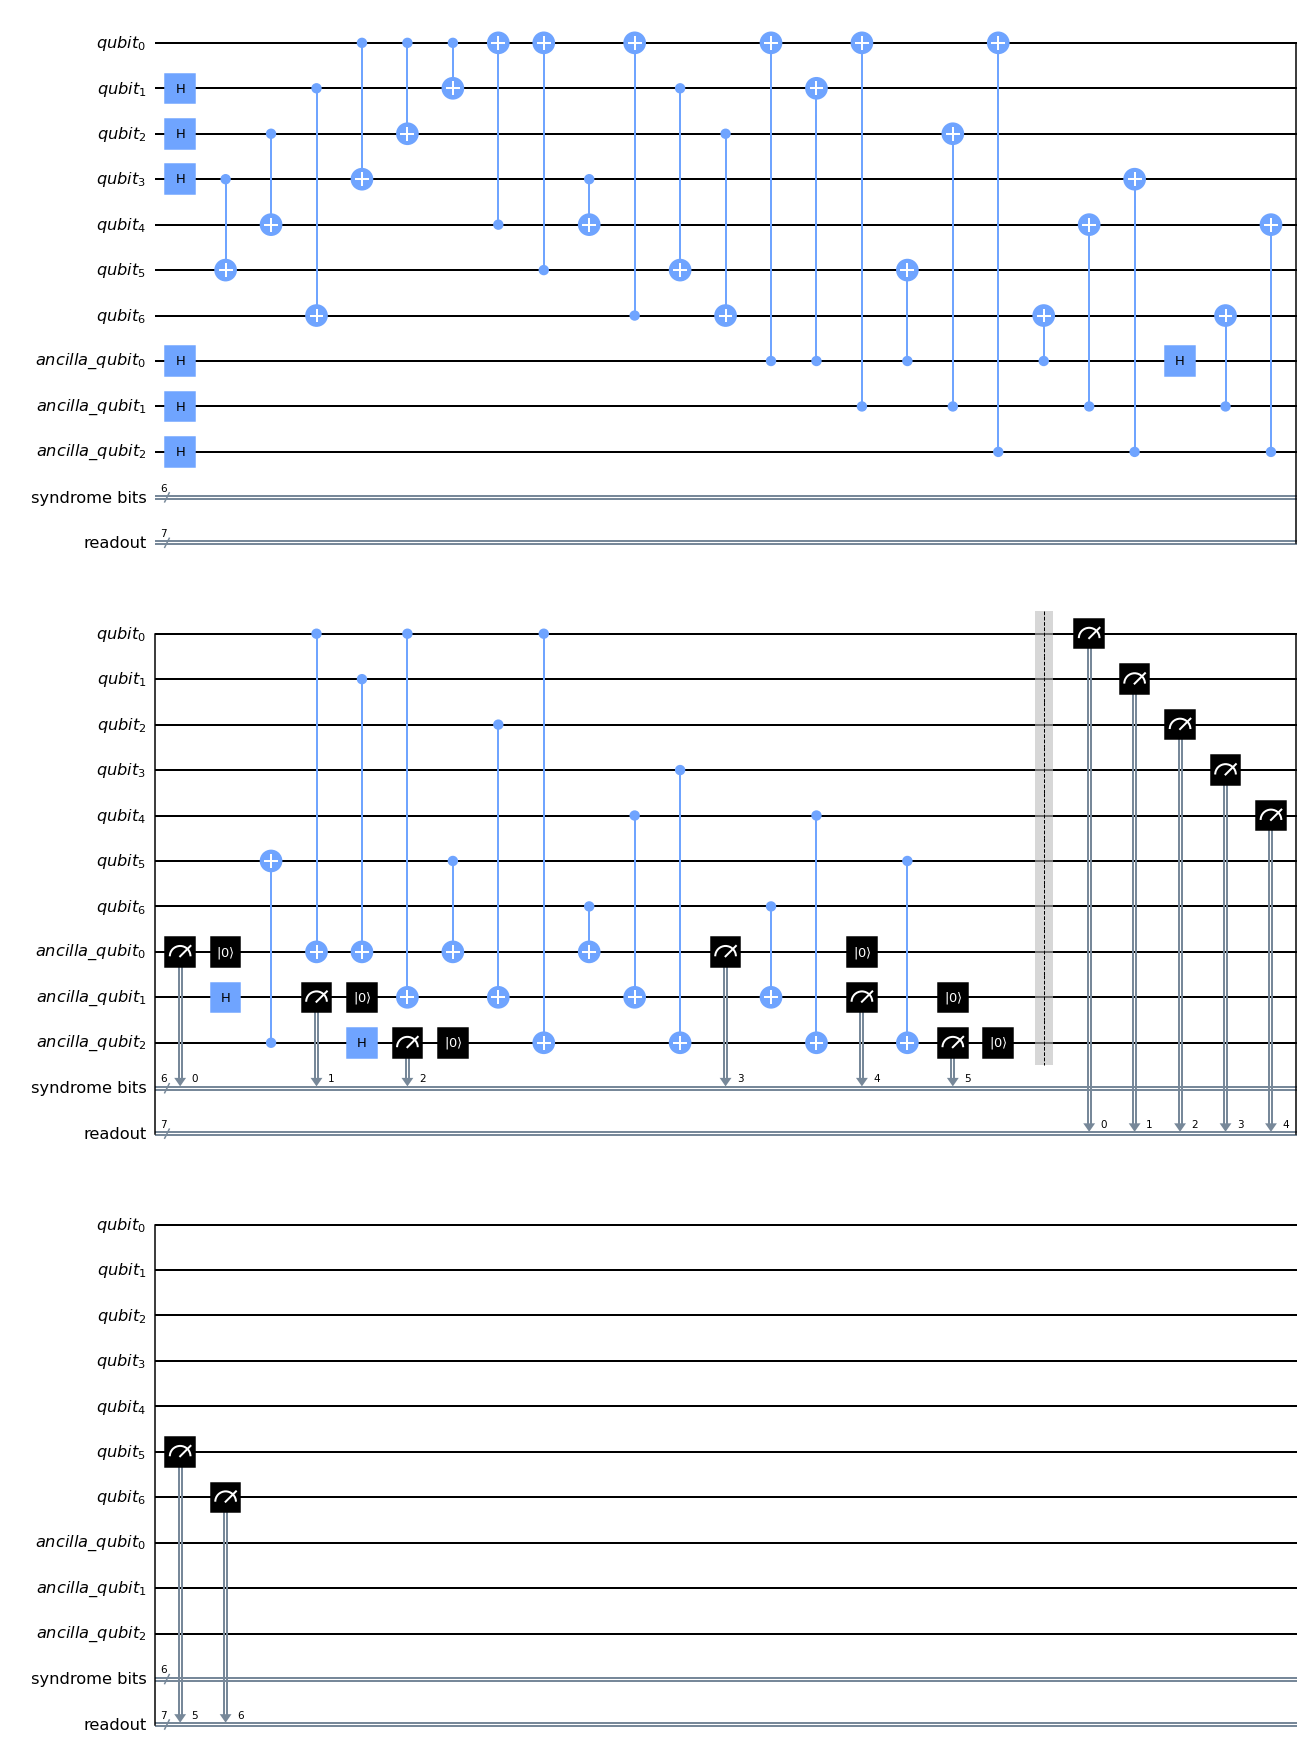

In [ ]:
display(circ.draw(output='mpl'))

In [ ]:
n_shots = 1024
results = execute(
    circ,
    Aer.get_backend('qasm_simulator'),
    noise_model=None,
    shots=n_shots
).result()

In [ ]:
results.get_counts(circ)

{'1010101 000000': 125,
 '1101100 000000': 142,
 '0111001 000000': 143,
 '0001111 000000': 115,
 '1100011 000000': 146,
 '1011010 000000': 117,
 '0110110 000000': 124,
 '0000000 000000': 112}

In [ ]:
import pandas as pd
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, ClassicalRegister

"""
This code is an implementation of the (non-fault tolerant) 5-qubit-code, otherwise known as the [[5,1,3]] code or the perfect code.
Useful references:
https://web.mit.edu/8.371/www/lectures/lect06.pdf
https://www.lorentz.leidenuniv.nl/quantumcomputers/literature/preskill_7.pdf
https://arxiv.org/pdf/1010.3242.pdf
https://www.physics.unlv.edu/~bernard/MATH_book/Chap9/Notebook9_3.pdf
"""

def ket_0(U,qubits):
    """
    Initialise the 5 qubit register into logical ket 0 state.
    The logical vectors were derived using Wolfram Mathematica.
    """
    five_qubits = QuantumRegister(5)
    logical_ket0_vector = [1/4, 0, 0, 1/4, 0, -(1/4), 1/4, 0, 0, -(1/4), -(1/4), 0, 1/4, 0, 0, -(1/4), 0, 1/4, -(1/4), 0, -(1/4), 0, 0, -(1/4), 1/4, 0, 0, -(1/4), 0, -(1/4), -(1/4), 0]
    temp_U = QuantumCircuit(five_qubits)
    temp_U.initialize(logical_ket0_vector, range(5))
    U.append(temp_U.to_instruction(label="\\ket{0}\\textsubscript{\\textit{L}}"),qubits)


def ket_1(U,qubits):
    """
    Initialise the 5 qubit register into logical ket 1 state.
    The logical vectors were derived using Wolfram Mathematica.
    """
    five_qubits = QuantumRegister(5)
    logical_ket1_vector = [0, -(1/4), -(1/4), 0, -(1/4), 0, 0, 1/4, -(1/4), 0, 0, -(1/4), 0, -(1/4), 1/4, 0, -(1/4), 0, 0, 1/4, 0, -(1/4), -(1/4), 0, 0, 1/4, -(1/4), 0, 1/4, 0, 0, 1/4]
    temp_U = QuantumCircuit(five_qubits)
    temp_U.initialize(logical_ket1_vector, range(5))
    U.append(temp_U.to_instruction(label="\\ket{1}\\textsubscript{\\textit{L}}"),qubits)

def S0(U,ancillas,qubits):
    U.cz(ancillas[3],qubits[0])
    U.cx(ancillas[3],qubits[1])
    U.cx(ancillas[3],qubits[2])
    U.cz(ancillas[3],qubits[3])

def S1(U,ancillas,qubits):
    U.cx(ancillas[2],qubits[0])
    U.cx(ancillas[2],qubits[1])
    U.cz(ancillas[2],qubits[2])
    U.cz(ancillas[2],qubits[4])

def S2(U,ancillas,qubits):
    U.cx(ancillas[1],qubits[0])
    U.cz(ancillas[1],qubits[1])
    U.cz(ancillas[1],qubits[3])
    U.cx(ancillas[1],qubits[4])

def S3(U,ancillas,qubits):
    U.cz(ancillas[0],qubits[0])
    U.cz(ancillas[0],qubits[2])
    U.cx(ancillas[0],qubits[3])
    U.cx(ancillas[0],qubits[4])

def iterate_single_qubit_errors():
    """
    The expected output should be:                        
    Single qubit error  Syndrome
    X[0]                   1001
    X[1]                   0010
    X[2]                   0101
    X[3]                   1010
    X[4]                   0100
    Z[0]                   0110
    Z[1]                   1100
    Z[2]                   1000
    Z[3]                   0001
    Z[4]                   0011
    Y[0]                   1111
    Y[1]                   1110
    Y[2]                   1101
    Y[3]                   1011
    Y[4]                   0111
    """
    backend = Aer.get_backend('qasm_simulator')
    df_index = [f'X[{j}]' for j in range(5)] + [f'Z[{j}]' for j in range(5)] + [f'Y[{j}]' for j in range(5)]
    df_columns = ['Syndrome']

    syndromes = []

    n_ancillas = 4
    n_qubits = 5

    ancillas = QuantumRegister(n_ancillas, name='a')
    qubits = QuantumRegister(n_qubits, name='q')
    creg = ClassicalRegister(n_ancillas)

    for i in range(15):
        U = QuantumCircuit(ancillas, qubits, creg)
        ket_0(U,qubits)
        U.barrier() # Introduce error!
        if 0<=i<=4:
            U.x(qubits[i%5])
        elif 5<=i<=9:
            U.z(qubits[i%5])
        else: # 10<=i<=14
            U.y(qubits[i%5])
        U.barrier()
        U.h(ancillas)
        U.barrier()
        S0(U,ancillas,qubits)
        U.barrier()
        S1(U,ancillas,qubits)
        U.barrier()
        S2(U,ancillas,qubits)
        U.barrier()
        S3(U,ancillas,qubits)
        U.barrier()
        U.h(ancillas)
        U.barrier()
        U.measure(ancillas,creg)
        results = execute(U, backend, shots=128).result()
        counts = results.get_counts()
        assert len(counts) == 1 # assert that there is only one unique syndrome measurement for each single qubit error
        syndromes.append( list( counts.keys() )[0] )
    df = pd.DataFrame(syndromes, columns = df_columns, index = pd.Index(df_index,name='Single qubit error'))
    return df

df = iterate_single_qubit_errors()
print(df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c782e670-8153-4fc7-a9a3-0ae2dddfa952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>